# LATE FUSION DATA COMBINING AND PREPARATION

In [2]:
import pandas as pd
fusion_csv = pd.read_csv(r"D:\Study\Thesis Backup\Thesis Codes\fusion dataset\fusion_csv.csv")
fusion_csv_txt = pd.read_csv(r"D:\Study\Thesis Backup\Thesis Codes\fusion dataset\fusion_csv_txt.csv")

In [3]:
fusion_csv

,img anxiety p,img not anxiety p
0,91.691750,8.308242
1,13.506813,86.493195
2,73.821210,26.178799
3,2.776053,97.223950
4,93.336586,6.663410
...,...,...
111,95.883224,4.116768
112,69.276010,30.723995
113,71.797035,28.202967
114,96.150960,3.849032


In [4]:
fusion_csv_txt

,txt_anxiety
0,0
1,0
2,0
3,1
4,0
...,...
111,0
112,0
113,0
114,0


In [5]:
fusion_csv_txt['anxiety str'] = ['not anxiety' if x == 1 else 'anxiety' for x in fusion_csv_txt['txt_anxiety']]
fusion_csv_txt.head(10)

,txt_anxiety,anxiety str
0,0,anxiety
1,0,anxiety
2,0,anxiety
3,1,not anxiety
4,0,anxiety
5,0,anxiety
6,0,anxiety
7,0,anxiety
8,0,anxiety
9,0,anxiety


In [6]:
fusion_csv_final = pd.DataFrame()
fusion_csv_final['img anxiety'] = [0 if anx > 70 else 1 for anx in fusion_csv['img anxiety p']]
fusion_csv_final['img anxiety'] = [0 if anx < 50 else 1 for anx in fusion_csv['img not anxiety p']]
fusion_csv_final['anxiety str'] = ['anxiety' if x == 0 else 'not anxiety' for x in fusion_csv_final['img anxiety']]

In [7]:
fusion_data_csv = pd.merge(fusion_csv_final, fusion_csv, left_index=True, right_index=True)

In [8]:
fusion_data_csv

,img anxiety,anxiety str,img anxiety p,img not anxiety p
0,0,anxiety,91.691750,8.308242
1,1,not anxiety,13.506813,86.493195
2,0,anxiety,73.821210,26.178799
3,1,not anxiety,2.776053,97.223950
4,0,anxiety,93.336586,6.663410
...,...,...,...,...
111,0,anxiety,95.883224,4.116768
112,0,anxiety,69.276010,30.723995
113,0,anxiety,71.797035,28.202967
114,0,anxiety,96.150960,3.849032


In [9]:
import pandas as pd

# Load text dataset 1
text_data_1 = fusion_data_csv

# Load text dataset 2
text_data_2 = fusion_csv_txt

# Perform any necessary preprocessing or feature extraction on the text datasets

# Merge the two text datasets based on a common key or index
merged_data = pd.merge(text_data_1, text_data_2, on='anxiety str')

# Perform late fusion by combining the features or representations from the two datasets
fusion_data = merged_data
fusion_data['anxiety'] = merged_data['img anxiety'] * merged_data['txt_anxiety']

# # Perform any additional processing or analysis on the fused data

# # Save the fused data to a new file
fusion_data

,img anxiety,anxiety str,img anxiety p,img not anxiety p,txt_anxiety,anxiety
0,0,anxiety,91.69175,8.308242,0,0
1,0,anxiety,91.69175,8.308242,0,0
2,0,anxiety,91.69175,8.308242,0,0
3,0,anxiety,91.69175,8.308242,0,0
4,0,anxiety,91.69175,8.308242,0,0
...,...,...,...,...,...,...
8763,1,not anxiety,27.23555,72.764450,1,1
8764,1,not anxiety,27.23555,72.764450,1,1
8765,1,not anxiety,27.23555,72.764450,1,1
8766,1,not anxiety,27.23555,72.764450,1,1


In [10]:
duplicate_rows = fusion_data[fusion_data.duplicated()]

In [11]:
duplicate_rows

,img anxiety,anxiety str,img anxiety p,img not anxiety p,txt_anxiety,anxiety
1,0,anxiety,91.69175,8.308242,0,0
2,0,anxiety,91.69175,8.308242,0,0
3,0,anxiety,91.69175,8.308242,0,0
4,0,anxiety,91.69175,8.308242,0,0
5,0,anxiety,91.69175,8.308242,0,0
...,...,...,...,...,...,...
8763,1,not anxiety,27.23555,72.764450,1,1
8764,1,not anxiety,27.23555,72.764450,1,1
8765,1,not anxiety,27.23555,72.764450,1,1
8766,1,not anxiety,27.23555,72.764450,1,1


In [12]:
fusion_data_without_duplicates = fusion_data.drop_duplicates()

# Save the dataset without duplicates to a new file
fusion_data_without_duplicates.to_csv(r'D:\Study\Thesis Backup\Thesis Codes\fusion dataset\fusion_data_without_duplicates_FINAL_v2.csv', index=False)

In [13]:
fusion_data_without_duplicates

,img anxiety,anxiety str,img anxiety p,img not anxiety p,txt_anxiety,anxiety
0,0,anxiety,91.691750,8.308242,0,0
109,0,anxiety,73.821210,26.178799,0,0
218,0,anxiety,93.336586,6.663410,0,0
327,0,anxiety,79.702576,20.297434,0,0
436,0,anxiety,96.942085,3.057918,0,0
...,...,...,...,...,...,...
8733,1,not anxiety,0.449689,99.550316,1,1
8740,1,not anxiety,2.352253,97.647740,1,1
8747,1,not anxiety,8.072909,91.927086,1,1
8754,1,not anxiety,0.201488,99.798515,1,1


In [14]:
fusion_data_without_duplicates.anxiety.unique()

array([0, 1], dtype=int64)

# FUSION MODEL MAKE AND SAVE

In [15]:
import numpy as np

In [16]:
x = fusion_data_without_duplicates.drop('anxiety str',axis=1,inplace=True)
x = fusion_data_without_duplicates.drop('anxiety',axis=1)
y = fusion_data_without_duplicates['anxiety']

C:\Users\saleh\AppData\Local\Temp\ipykernel_8612\1082608326.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x = fusion_data_without_duplicates.drop('anxiety str',axis=1,inplace=True)


In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,classification_report,roc_curve,auc,precision_recall_curve,average_precision_score

In [18]:

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Split the dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=11)

# Define the fusion model
fusion_model = Sequential()
fusion_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
fusion_model.add(Dense(1, activation='sigmoid'))

# Compile the fusion model
fusion_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the fusion model
fusion_model.fit(X_train, Y_train, epochs=10, batch_size=8)

# Evaluate the fusion model on the test set
test_predictions = fusion_model.predict(X_test)

Epoch 1/10
12/12 [==============================] - 1s 4ms/step - loss: 0.1826 - accuracy: 0.9565
Epoch 2/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0865 - accuracy: 0.9891
Epoch 3/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0688 - accuracy: 0.9891
Epoch 4/10
12/12 [==============================] - 0s 3ms/step - loss: 0.0446 - accuracy: 0.9891
Epoch 5/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0369 - accuracy: 0.9891
Epoch 6/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0182 - accuracy: 0.9891
Epoch 7/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0158 - accuracy: 1.0000
Epoch 8/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0121 - accuracy: 1.0000
Epoch 9/10
12/12 [==============================] - 0s 2ms/step - loss: 0.0140 - accuracy: 0.9891
Epoch 10/10
1/1 [==============================] - 0s 108ms/step


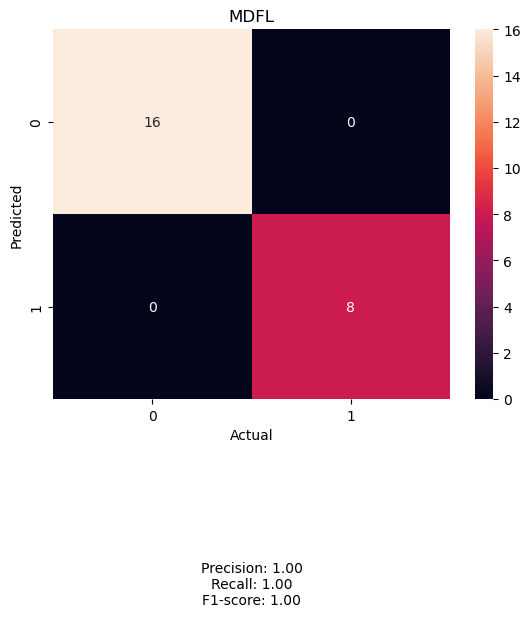

In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

test_predictions = (test_predictions > 0.5).astype(int)

cf = confusion_matrix(Y_test, test_predictions)
cf_df = pd.DataFrame(cf, index=[0, 1], columns=[0, 1])
sns.heatmap(cf, annot=True, fmt="d")  # Use fmt="d" to display integer values in the heatmap

# Calculate precision, recall, and F1-score
precision = precision_score(Y_test, test_predictions)
recall = recall_score(Y_test, test_predictions)
f1 = f1_score(Y_test, test_predictions)

# Display precision, recall, and F1-score
plt.title("MDFL")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.text(0.5, -0.5, f"Precision: {precision:.2f}\nRecall: {recall:.2f}\nF1-score: {f1:.2f}", 
         ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

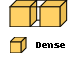

In [20]:
import visualkeras
from PIL import ImageFont
visualkeras.layered_view(fusion_model, legend=True)

# EXPERIMENT

1/1 [==============================] - 0s 100ms/step


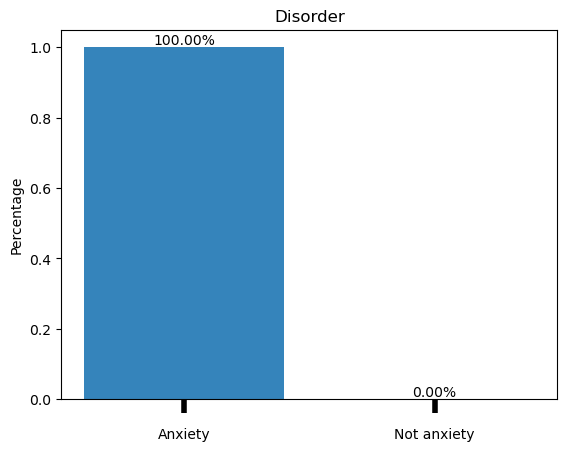

[[1. 0.]]


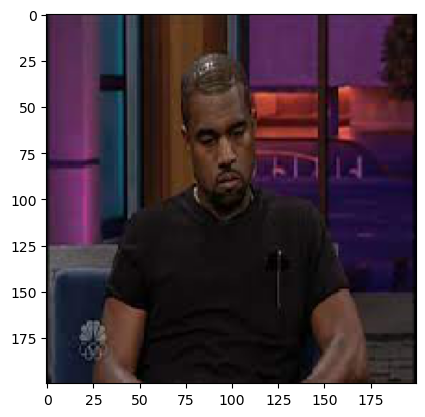

In [22]:
import pandas as pd
import numpy as np
def anxiety_analysis(anxiety):
    objects = ['Anxiety', 'Not anxiety']
    y_pos = np.arange(len(objects))
    plt.bar(y_pos, anxiety, align='center', alpha=0.9)

    total = sum(anxiety)

    for i, value in enumerate(anxiety):
        percentage = (value / total) * 100
        plt.text(i, value, f'{percentage:.2f}%', ha='center', va='bottom')

    plt.tick_params(axis='x', which='both', pad=10, width=4, length=10)
    plt.xticks(y_pos, objects)
    plt.ylabel('Percentage')
    plt.title('Disorder')
    plt.show()

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from skimage import io
from tensorflow.keras.models import load_model
import pickle
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

image_model = load_model('D:\Study\Thesis Backup\Thesis Codes\saved models\Gabor_model.keras')

with open(r"D:\Study\Thesis Backup\Thesis Codes\saved models\pickle_anxiety_grid_model_final.pickle", 'rb') as f:
    text_model = pickle.load(f)

# Load and preprocess image
img_path = r"D:\Study\Thesis Backup\Thesis Codes\KW_sad.jpg"
# img = Image.open(img_path)
# img_pred = predict_image(img_path)

img = load_img(img_path, color_mode="grayscale", target_size=(48, 48))
show_img=load_img(img_path, grayscale=False, target_size=(200, 200))
x = img_to_array(img)
x = np.expand_dims(x, axis = 0)

# x /= 255.0

img_pred = image_model.predict(x)
    
anxiety_analysis(img_pred[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

print(img_pred)
plt.gray()
plt.imshow(show_img)
plt.show()

m=0.000000000000000000001
a=img_pred[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i

In [23]:
img_pred[0][1]

0.0

In [24]:
if img_pred[0][0] > img_pred[0][1]:
    prediction_img = 0
else:
    prediction_img = 1
prediction_img

0

In [25]:
dt = {
     'Dryness_of_mouth':1,
    
     'Breathing_difficulty':2,

      'Experienced_trembling':2,

      'Worried_about_panic_and_make_a_fool_of_myself':1,
    
      'Close_to_panic':2,

      'Aware_of_the_action_of_heart_in_the_absence_of_physical_exertion':0,
    
      'Scared_without_any_good_reason':3,
   
     }
index=[0]
exp_dt = pd.DataFrame(dt,index)
exp_dt

,Dryness_of_mouth,Breathing_difficulty,Experienced_trembling,Worried_about_panic_and_make_a_fool_of_myself,Close_to_panic,Aware_of_the_action_of_heart_in_the_absence_of_physical_exertion,Scared_without_any_good_reason
0,1,2,2,1,2,0,3


In [26]:
text_model.predict(exp_dt)

array([4], dtype=int64)

In [27]:
prediction_txt = text_model.predict(exp_dt)

if any(p in [1, 2, 3, 4] for p in prediction_txt):
    prediction_txt = 0
else:
    prediction_txt = 1

print(prediction_txt)

0


In [28]:
fusion_data = pd.DataFrame(index=[0])
fusion_data['img anxiety']=prediction_img
fusion_data['img anxiety p']=img_pred[0][0]
fusion_data['img not anxiety p']=img_pred[0][1]
fusion_data['txt_anxiety']=prediction_txt

fusion_data

,img anxiety,img anxiety p,img not anxiety p,txt_anxiety
0,0,1.0,0.0,0


In [29]:
print(fusion_model.predict(fusion_data))
print(np.round(fusion_model.predict(fusion_data)))

1/1 [==============================] - 0s 31ms/step
[[0.47270387]]
1/1 [==============================] - 0s 26ms/step
[[0.]]


In [30]:
if np.round(fusion_model.predict(fusion_data)) == 0:
    print("The Person is Anxious")
else:
    print("The Person is not Anxious")

1/1 [==============================] - 0s 32ms/step
The Person is Anxious
